In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


crypto_path = "resources/cleaned_crypto.csv"
xiv_path = "resources/vix_data.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)
vix_data = pd.read_csv(xiv_path)

In [2]:
#filter the data with 4 agreed cryptos

fourcoin_data = crypto_data.loc[crypto_data['crypto_name'].isin(['Bitcoin','Ethereum','Dogecoin','Stellar'])]

In [33]:
#grouping the data based on their name and trade year 

#fourcoin_data = fourcoin_data.groupby(['trade_year', 'crypto_name'])

#fourcoin_data.head(20)


,Unnamed: 0,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable,trade_year,trade_month,trade_day
0,0,2016-01-01,36278900.0,434.330000,6.529300e+09,0.000000,0.000000,Bitcoin,0.0,BTC,1.0,2016,1,1
1,1,2016-01-02,30096600.0,433.440000,6.517390e+09,-0.001824,-0.002049,Bitcoin,0.0,BTC,1.0,2016,1,2
2,2,2016-01-03,39633800.0,430.010000,6.467430e+09,-0.007666,-0.007913,Bitcoin,0.0,BTC,1.0,2016,1,3
3,3,2016-01-04,38477500.0,433.090000,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0,2016,1,4
4,4,2016-01-05,34522600.0,431.960000,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0,2016,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36809,37849,2020-01-16,98124199.0,0.002345,2.882335e+08,-0.009949,-0.010131,Dogecoin,0.0,DOGE,1.0,2020,1,16
36810,37850,2020-01-17,117752841.0,0.002490,3.060984e+08,0.061981,0.061834,Dogecoin,0.0,DOGE,1.0,2020,1,17
36811,37851,2020-01-18,108133943.0,0.002507,3.082421e+08,0.007003,0.006827,Dogecoin,0.0,DOGE,1.0,2020,1,18
36812,37852,2020-01-19,108085147.0,0.002405,2.957324e+08,-0.040584,-0.040686,Dogecoin,0.0,DOGE,1.0,2020,1,19


In [22]:

vix_data = vix_data[["Date","Adj Close"]]
vix_data = vix_data.rename(columns={"Adj Close": "Adj_close"})
vix_data.head()

,Date,Adj_close
0,2016-01-04,20.700001
1,2016-01-05,19.340000
2,2016-01-06,20.590000
3,2016-01-07,24.990000
4,2016-01-08,27.010000


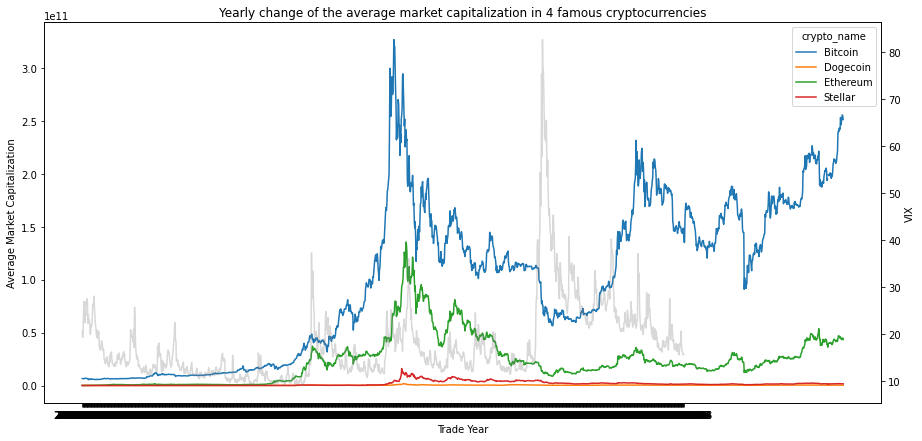

In [30]:
#Yearly change of the market cap in 4 famous crypto

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
first_plot = fourcoin_data.groupby(['trade_date','crypto_name']).mean()['market_cap'].unstack().plot(ax=ax)
first_plot.set_xlabel("Trade Year")
first_plot.set_ylabel("Average Market Capitalization")




ax2 = first_plot.twinx()
ax2.plot(vix_data.Date, vix_data.Adj_close, color = "grey", alpha = 0.3)
ax2.set_ylabel('VIX')  # we already handled the x-label with ax1


#plt.xlabel("Trade Year")
#plt.ylabel("Average Market Capitalization")
plt.title("Yearly change of the average market capitalization in 4 famous cryptocurrencies")

plt.savefig("Yearly change of the market cap in 4 famous crypto.png")

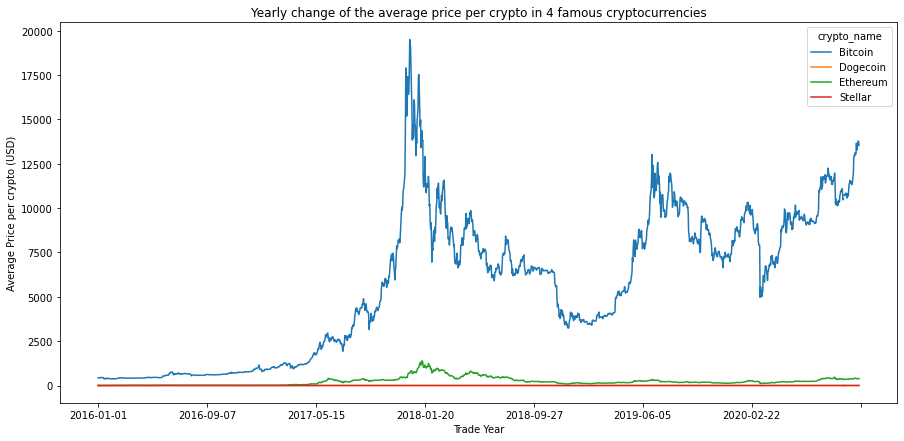

In [11]:
#Yearly change of the average price in 4 famous crypto

#plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
fourcoin_data.groupby(['trade_date','crypto_name']).mean()['price_usd'].unstack().plot(ax=ax)

plt.xlabel("Trade Year")
plt.ylabel("Average Price per crypto (USD)")
plt.title("Yearly change of the average price per crypto in 4 famous cryptocurrencies")

plt.savefig("Yearly change of the average price in 4 famous crypto.png")

Text(0.5, 1.0, 'Yearly change of the total volume in 4 famous crypto.png')

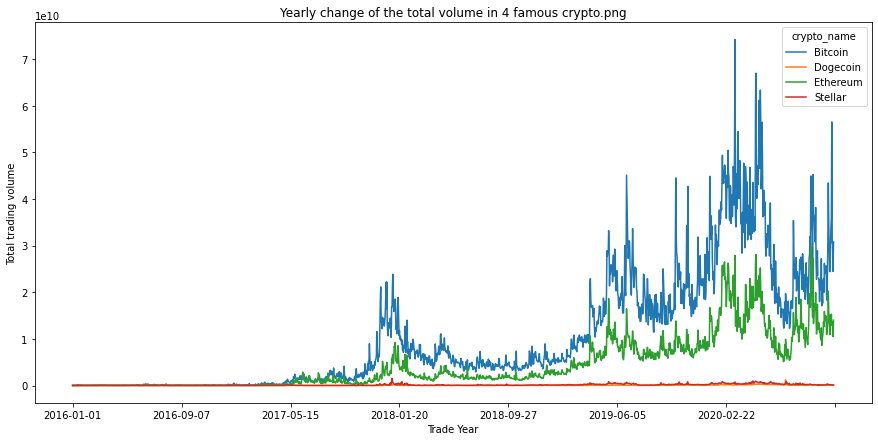

In [12]:
#Yearly change of the total volume in 4 famous crypto
fourcoin_data = crypto_data.loc[crypto_data['crypto_name'].isin(['Bitcoin','Ethereum','Dogecoin','Stellar'])]
#plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
fourcoin_data.groupby(['trade_date','crypto_name']).sum()['volume'].unstack().plot(ax=ax)

plt.xlabel("Trade Year")
plt.ylabel("Total trading volume")
plt.title("Yearly change of the total volume in 4 famous crypto.png")